In [10]:
# todo:
# add to regular python script
# change python script to allow for fixed or cumsum graph

# get actual Epoint value

# return,[[n*(1.-1./(9.*n)-1./(3.*sqrt(n)))^3.-n],[n+sqrt(n+0.75)+1.0-n]]

In [2]:
%matplotlib inline
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

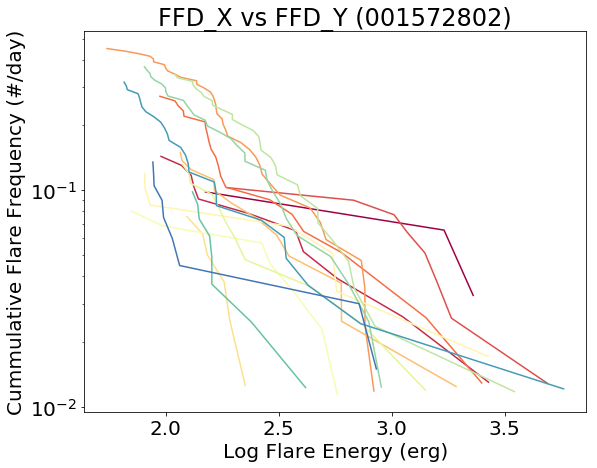

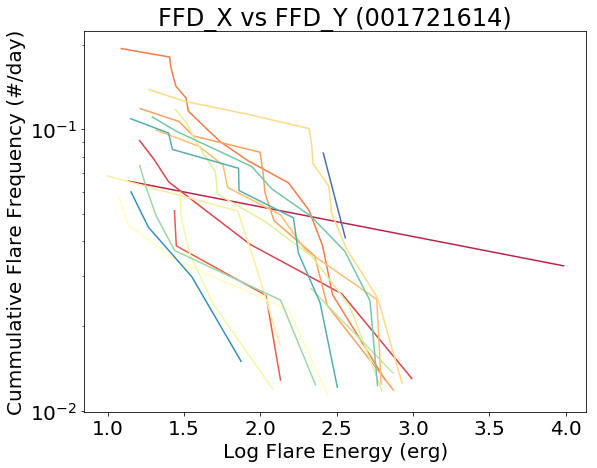

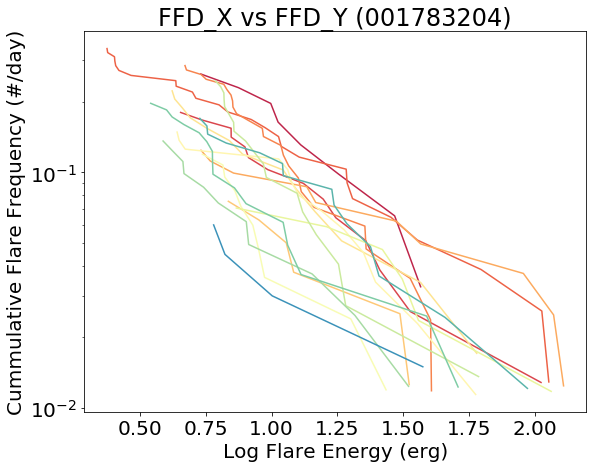

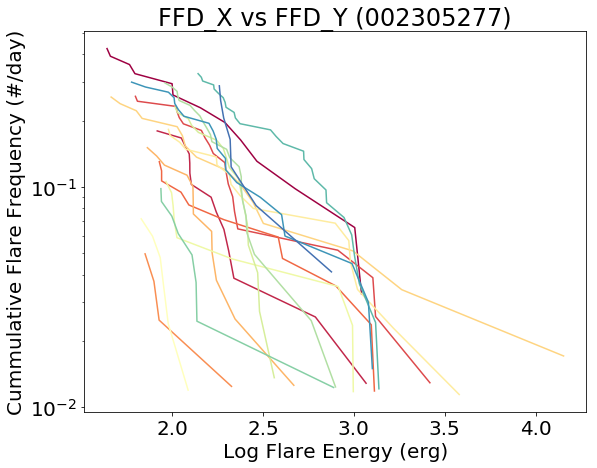

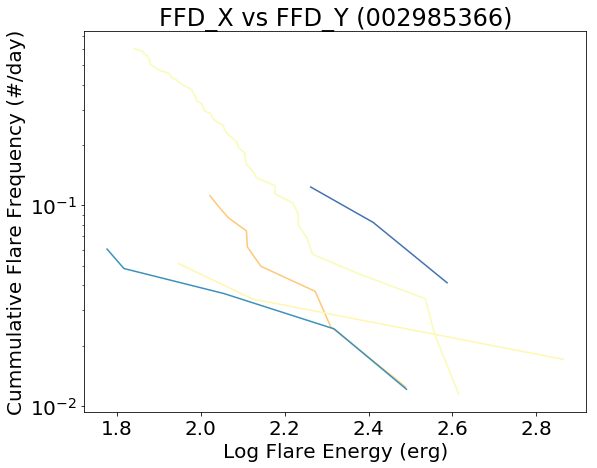

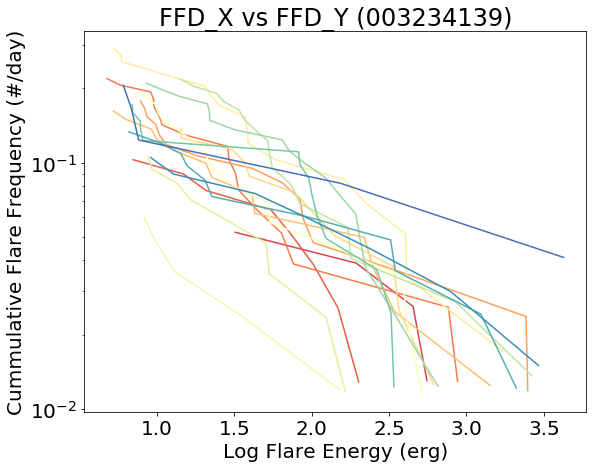

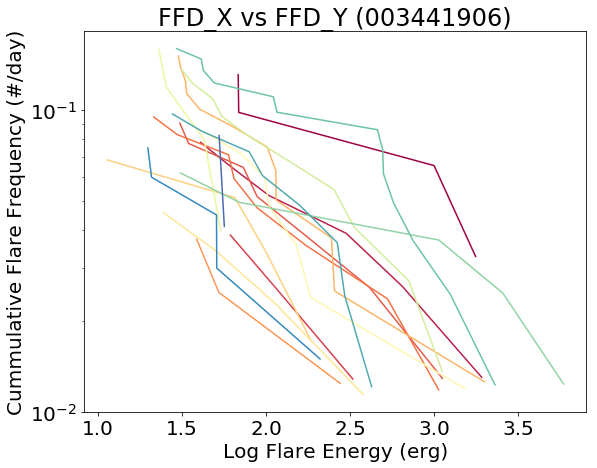

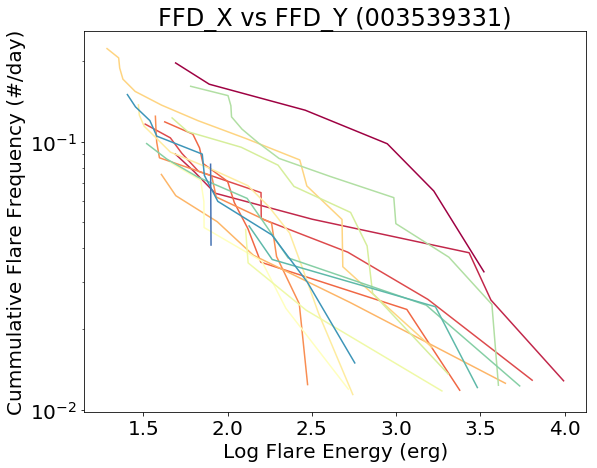

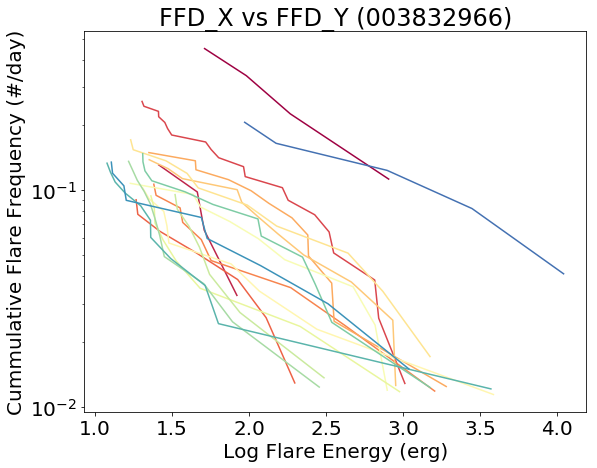

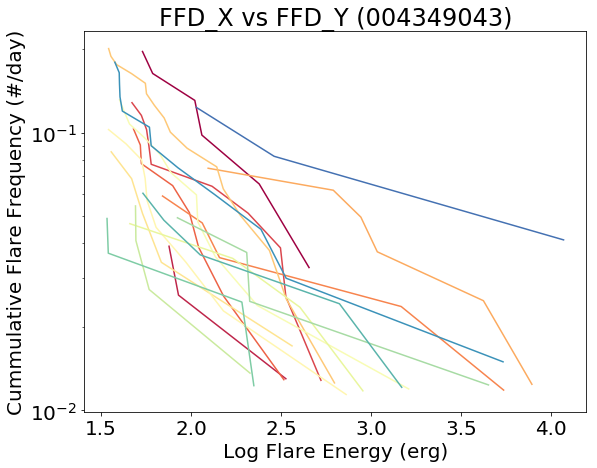

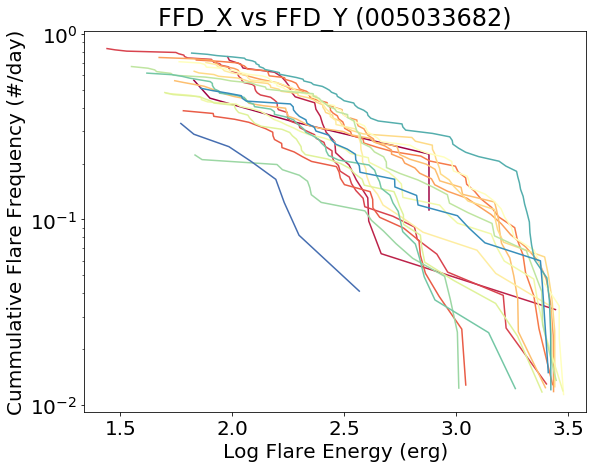

In [73]:
#plotting a reverse cummulative sum for a single KIC# number, hoping for a smooth change in frequency over time
#plotting only the significant data

targets = open("KICs/targets.txt", "r") # a file containing all the KICs we want to plot
EPOINT = 0 # need to fix this

np.seterr(invalid='ignore') #ignore the Nans
plt.rcParams.update({'font.size': 20}) #font size
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")

for line in targets: #going through each KIC
    
    KIC = line.rstrip('\n') #stripping the return off each line
    files = glob('KICs/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    
    plt.figure(figsize=(9,7))
    plt.title("FFD_X vs FFD_Y ("+KIC+')')
    plt.ylabel("Cummulative Flare Frequency (#/day)")
    plt.xlabel("Log Flare Energy (erg)")
    plt.yscale('log')

    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0]  #getting the total duration of each file
                
        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] #This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array

        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

        ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk
    
        plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #only plotting significant data, using ok68
        
    plt.savefig('ffd_x-vs-ffd_y-sig-plot/'+KIC+'_whole_FFD.png')



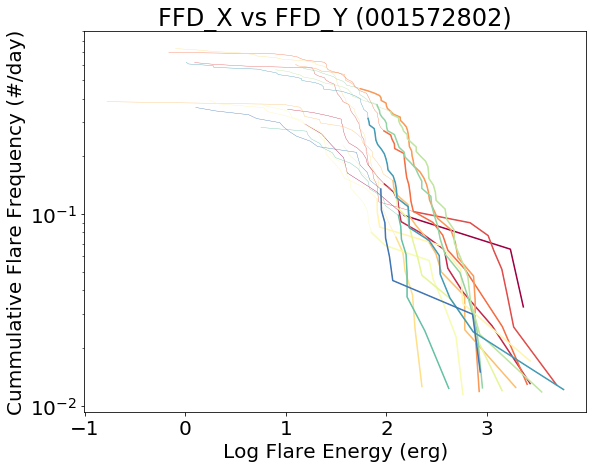

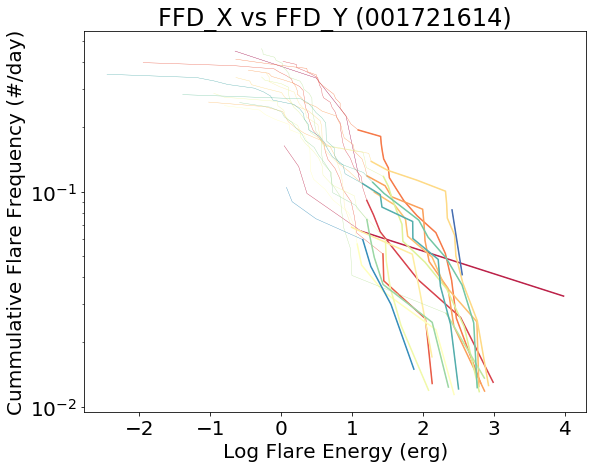

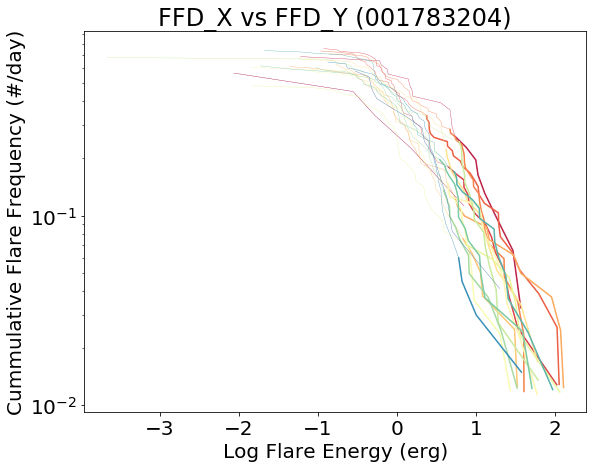

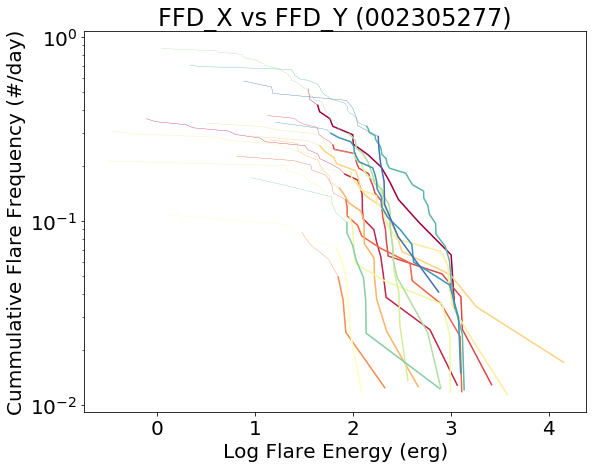

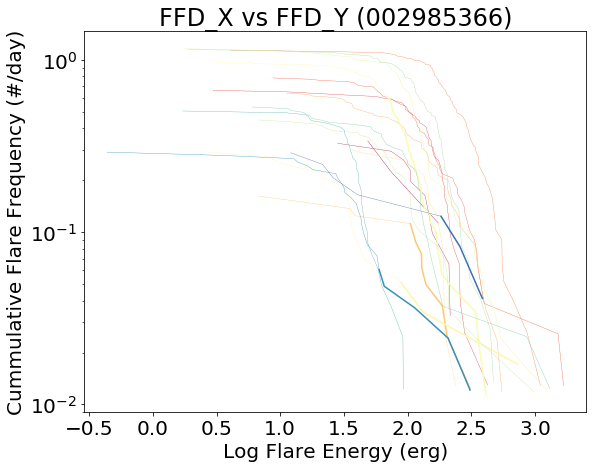

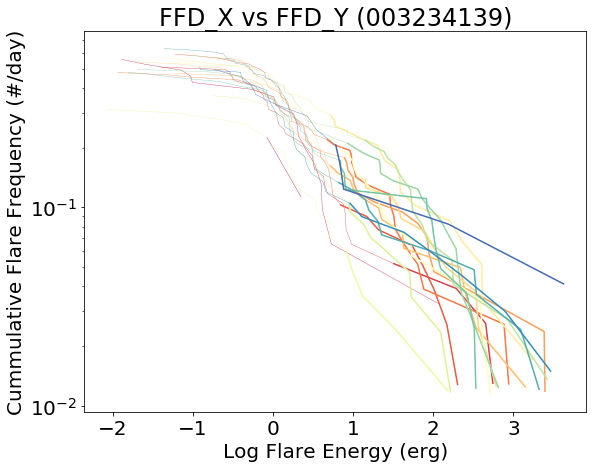

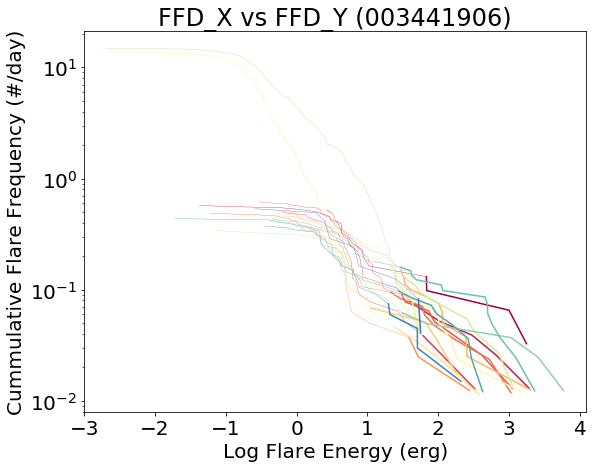

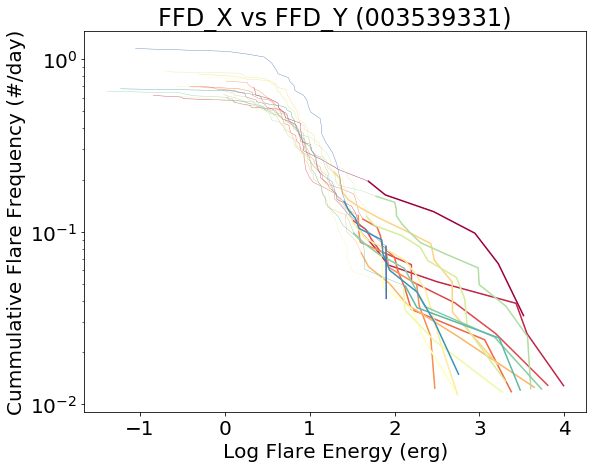

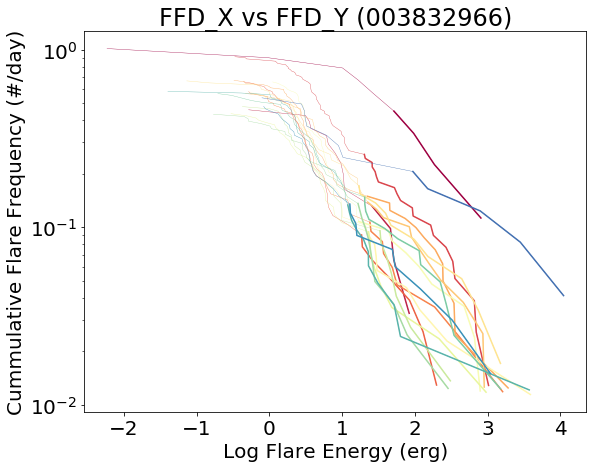

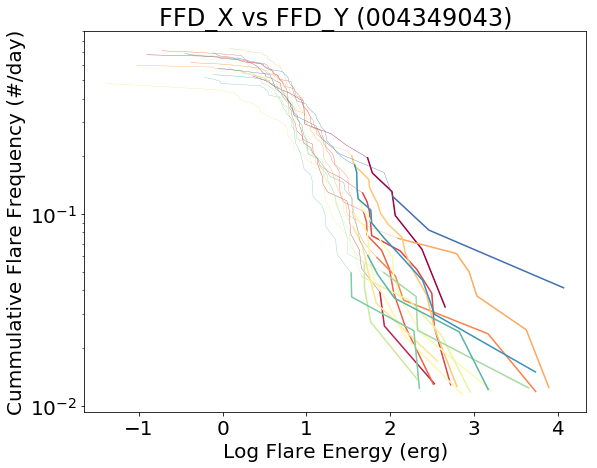

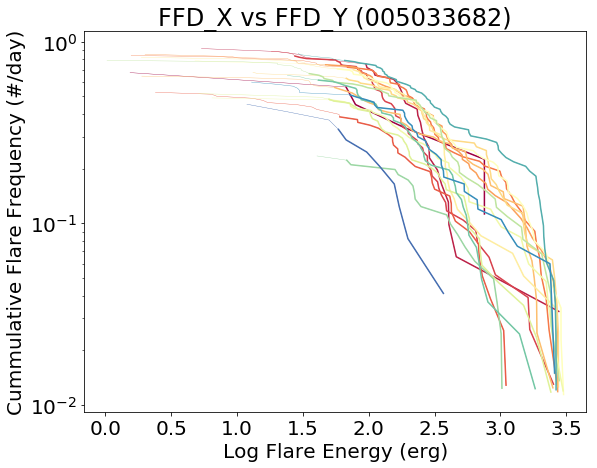

In [68]:
#plotting a reverse cummulative sum for a single KIC# number, hoping for a smooth change in frequency over time
#plotting all of the data, with data below the ED68i cutoff being the thinner lines

targets = open("KICs/targets.txt", "r") # a file containing all the KICs we want to plot
EPOINT = 0 # need to fix this

np.seterr(invalid='ignore') #ignore the Nans
plt.rcParams.update({'font.size': 20}) #font size
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")

for line in targets: #going through each KIC
    
    KIC = line.rstrip('\n') #stripping the return off each line
    files = glob('KICs/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    
    plt.figure(figsize=(9,7))
    plt.title("FFD_X vs FFD_Y ("+KIC+')')
    plt.ylabel("Cummulative Flare Frequency (#/day)")
    plt.xlabel("Log Flare Energy (erg)")
    plt.yscale('log')

    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0]  #getting the total duration of each file
                
        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] #This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array

        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

        ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk
    
        plt.plot(ffd_xEnergy, ffd_yFrequency, lw = .35, c = cmap(x/float(len(files)))) #all data
        plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #significant data
        
    plt.savefig('ffd_x-vs-ffd_y-whole-plot/'+KIC+'_whole_FFD.png')


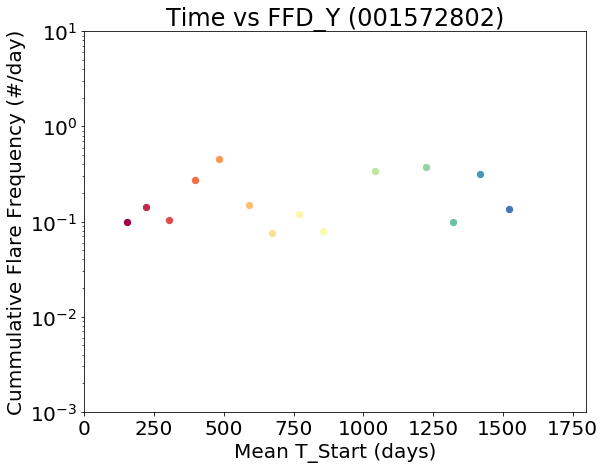

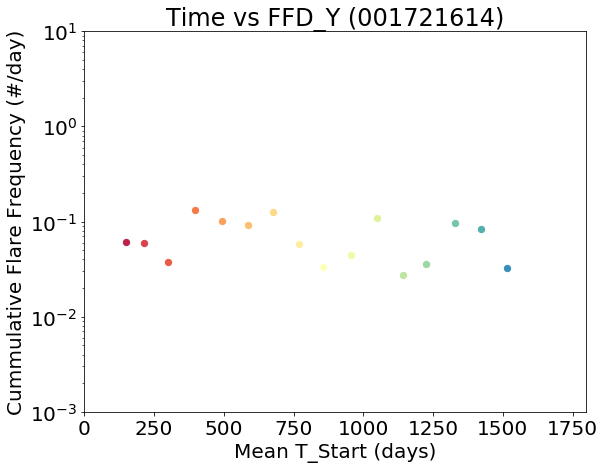

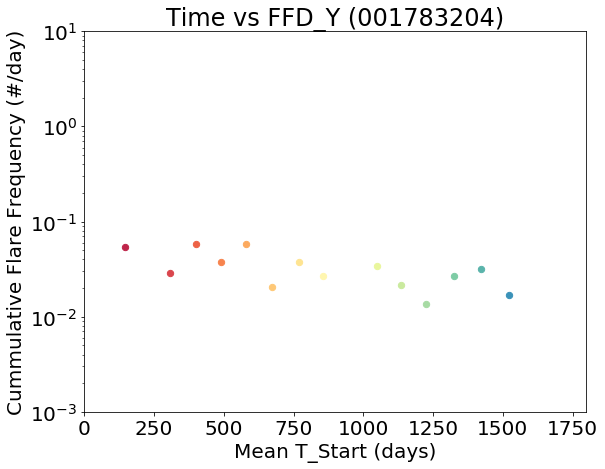

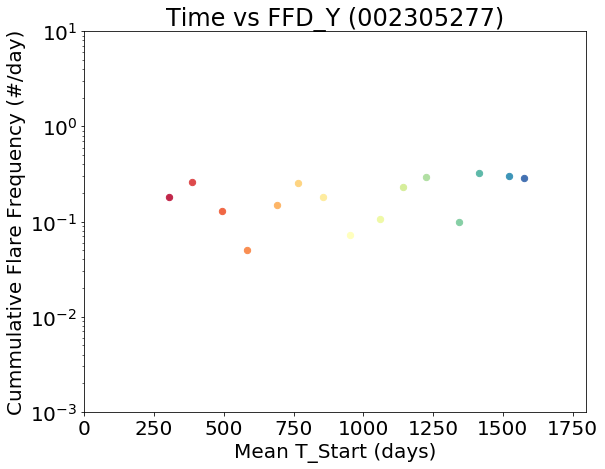

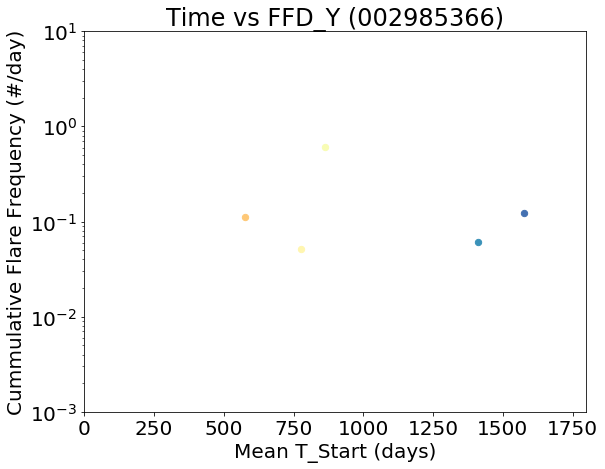

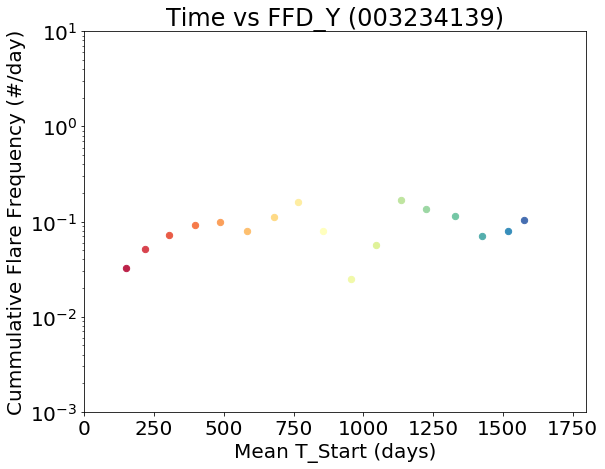

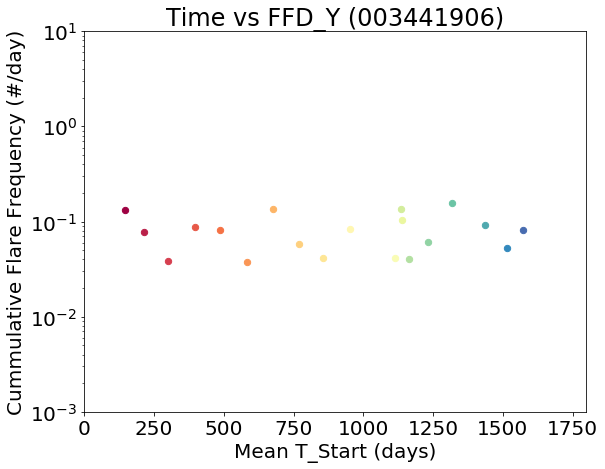

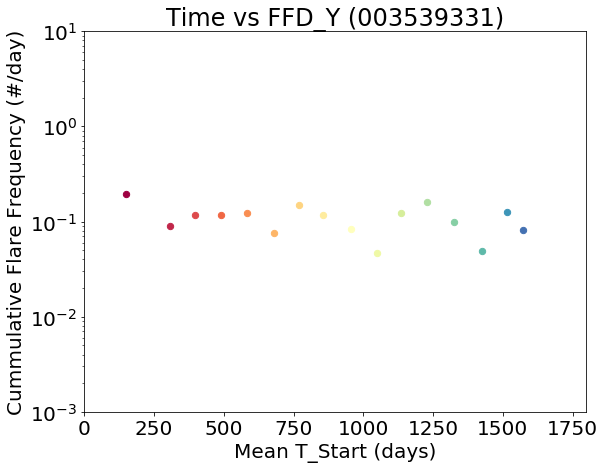

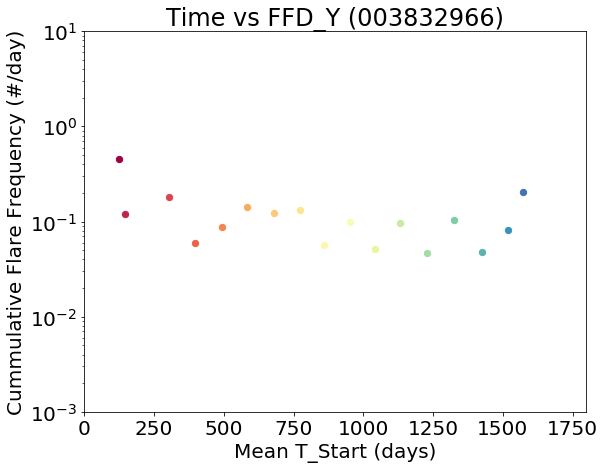

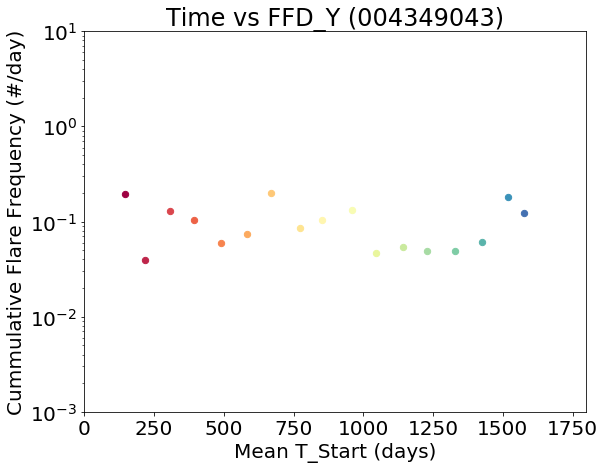

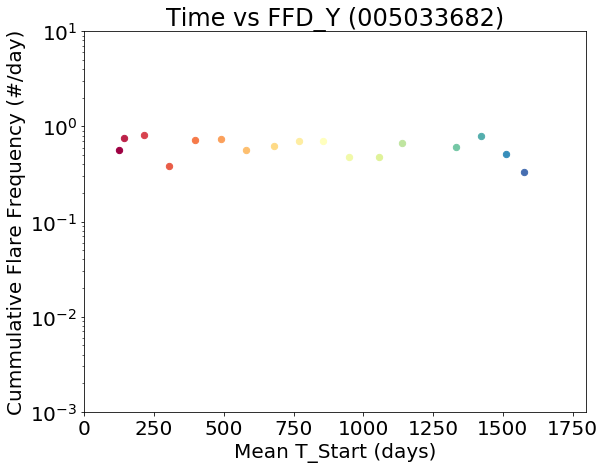

In [69]:
#Specify a fixed log-energy value. Plot the mean-time vs FFD_y values = plot time vs flare rate per day

targets = open("KICS/targets.txt", "r") # a file containing all the KICs we want to plot
EPOINT = 0 # need to fix this

logEnergyConstant = 1.5 + EPOINT # the fixed energy value

np.seterr(invalid='ignore') #ignore the Nans
plt.rcParams.update({'font.size': 20}) #font size
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")

for line in targets: #going through each KIC
    
    KIC = line.rstrip('\n') #stripping the return off each line
    files = glob('KICS/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    
    plt.figure(figsize=(9,7))
    plt.title("Time vs FFD_Y ("+KIC+')')
    plt.ylabel("Cummulative Flare Frequency (#/day)")
    plt.xlabel("Mean T_Start (days)")
    plt.yscale('log')
    plt.ylim([0.001,10])
    plt.xlim([0,1800])
    
    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0]  #getting the total duration of each file

        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] #This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array


        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

        if(np.amax(ffd_xEnergy) >= logEnergyConstant >= np.amin(ffd_xEnergy)): #checking that the energy constant isn't out of bound,
                                                                               #otherwise, interpolate doesn't work

            ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

            meanstart = np.sum(df['t_start'])/len(df['t_start']) #finding the mean time for a file
            
            if any(ok68): #checking if ok68 contains at least one 'true'
                ffd_yForMeanstart = np.interp(logEnergyConstant, ffd_xEnergy[ok68][::-1], ffd_yFrequency[ok68][::-1])#interpolating the ffd_y

                plt.scatter(meanstart, ffd_yForMeanstart, s=40, c = cmap(x/float(len(files))))
            
    plt.savefig('time-vs-ffd_y-plot/'+KIC+'_vs_time.png')


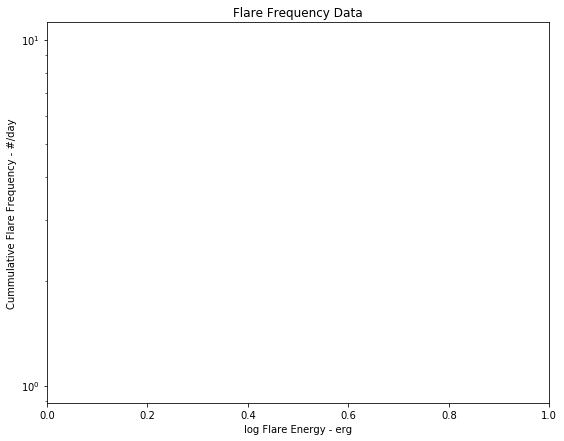

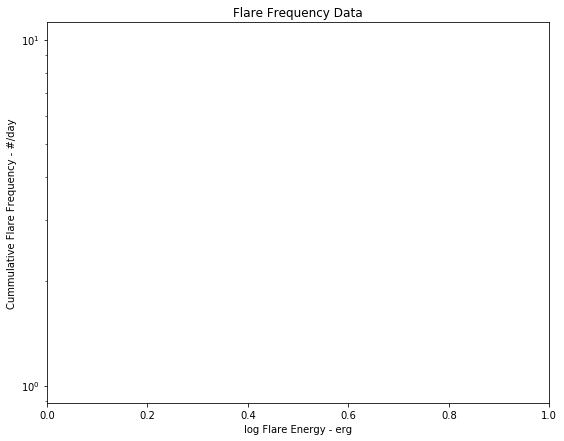

In [2]:
##to be used from terminal ----python flaregraphs.py KIC# KIC# ----
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

for y in range(len(sys.argv) - 1):

    dir = sys.argv[y+1] #StarID/directory
    files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    EPOINT = 0 # need to fix this
    names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
           "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
           "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


    plt.figure(figsize=(9,7))
    plt.yscale('log')
    plt.xlabel("log Flare Energy - erg")
    plt.ylabel("Cummulative Flare Frequency - #/day")
    plt.title("Flare Frequency Data")
    cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
    np.seterr(invalid='ignore')#ignore the Nans


    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0] #getting the total duration of each file

        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] # This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array

        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day
        ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

        plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #c = visible color spectrum over time, starting with red as the earliest


plt.show()


AttributeError: '_io.TextIOWrapper' object has no attribute 'txt'